## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [11]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/Lilian/Downloads/Data Analytics Course/Data Analytics Immersion/Acheivement 6/Project/Data/'

In [5]:
airbnb = pd.read_csv(os.path.join(path,'airbnb-europe.csv'))

In [6]:
airbnb.shape

(41714, 19)

In [7]:
airbnb.head()

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677


In [12]:
#Extracting only numeric columns
df_nums = airbnb [['Price','Person Capacity','Cleanliness Rating',
                  'Guest Satisfaction','Bedrooms','City Center (km)',
                  'Metro Distance (km)', 'Normalised Attraction Index', 
                  'Normalised Restraunt Index'
                 ]]

In [15]:
# identified outliers 
df_nums.describe()


,Price,Person Capacity,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,9.442274,93.103179,1.165939,2.679792,0.603921,11.719658,25.553590
std,279.408493,1.299459,0.889173,8.141745,0.638157,1.996684,0.706206,8.379161,18.484572
min,34.779339,2.000000,2.000000,20.000000,0.000000,0.015045,0.002301,0.926301,0.592757
25%,144.016085,2.000000,9.000000,90.000000,1.000000,1.275913,0.236693,5.510735,11.132052
50%,203.819274,3.000000,10.000000,95.000000,1.000000,2.253237,0.391220,9.951086,21.814414
75%,297.373358,4.000000,10.000000,98.000000,1.000000,3.584489,0.678702,15.467009,36.821356
max,18545.450285,6.000000,10.000000,100.000000,10.000000,25.284557,14.273577,100.000000,100.000000


#### price column has extreme numbers which can be removed 

In [20]:
# creating a new df that filters out the extreme price values 

df_nums_new = df_nums[df_nums['Price']<500]

In [21]:
df_nums_new.head()

,Price,Person Capacity,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index
0,194.033698,2.0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473
1,344.245776,4.0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928
2,264.101422,2.0,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700
3,433.529398,4.0,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565
4,485.552926,2.0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677


In [22]:
df_nums_new.describe()

,Price,Person Capacity,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index
count,38420.000000,38420.000000,38420.000000,38420.000000,38420.000000,38420.000000,38420.000000,38420.000000,38420.000000
mean,213.101593,3.164394,9.443571,93.067413,1.124310,2.706447,0.610620,11.070258,24.452172
std,95.744776,1.268192,0.886997,8.097739,0.601937,2.016380,0.715952,7.858728,17.921407
min,34.779339,2.000000,2.000000,20.000000,0.000000,0.034661,0.002301,0.926301,0.592757
25%,138.963748,2.000000,9.000000,90.000000,1.000000,1.291473,0.241647,5.262969,10.336576
50%,193.580062,3.000000,10.000000,95.000000,1.000000,2.279396,0.397227,9.456424,20.697902
75%,267.120075,4.000000,10.000000,98.000000,1.000000,3.616808,0.683391,14.602949,35.122907
max,499.918542,6.000000,10.000000,100.000000,10.000000,25.284557,14.273577,100.000000,100.000000


### 2. The elbow technique

In [26]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [27]:
score = [kmeans[i].fit(df_nums_new).score(df_nums_new) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-369702488.81386083,
 -127064033.21685483,
 -68046087.84153594,
 -46260800.43145472,
 -35493814.795579135,
 -29578261.9184819,
 -25746486.084703803,
 -23339901.513258316,
 -21497550.645456966]

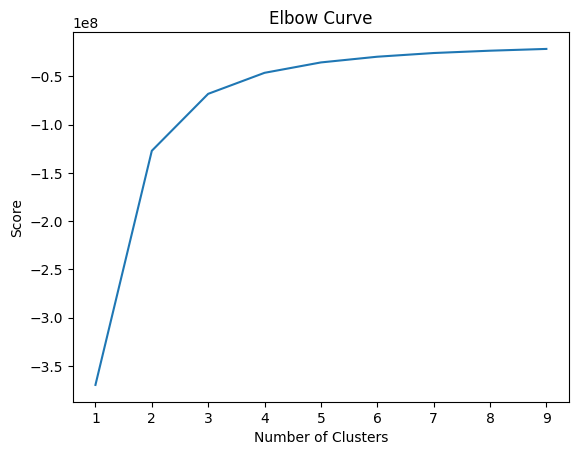

In [28]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#####  In this example, there's a large jump from two to four on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. k-means clustering

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [30]:
# Fit the k-means object to the data.

kmeans.fit(df_nums_new)

KMeans(n_clusters=4)

In [45]:
df_nums_new['clusters'] = kmeans.fit_predict(df_nums_new)

/var/folders/qs/9rqsgdxj377_cxzw1z92pxbh0000gn/T/ipykernel_21048/1109844668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums_new['clusters'] = kmeans.fit_predict(df_nums_new)


In [32]:
df_nums_new.head()

,Price,Person Capacity,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Normalised Attraction Index,Normalised Restraunt Index,clusters
0,194.033698,2.0,10.0,93.0,1,5.022964,2.539380,4.166708,6.846473,0
1,344.245776,4.0,8.0,85.0,1,0.488389,0.239404,33.421209,58.342928,1
2,264.101422,2.0,9.0,87.0,1,5.748312,3.651621,3.985908,6.646700,1
3,433.529398,4.0,9.0,90.0,2,0.384862,0.439876,26.119108,60.973565,3
4,485.552926,2.0,10.0,98.0,1,0.544738,0.318693,29.272733,56.811677,3


In [33]:
df_nums_new['clusters'].value_counts()

clusters
0    13130
2    12893
1     8389
3     4008
Name: count, dtype: int64

### Cluster for Price and Distance from City Center

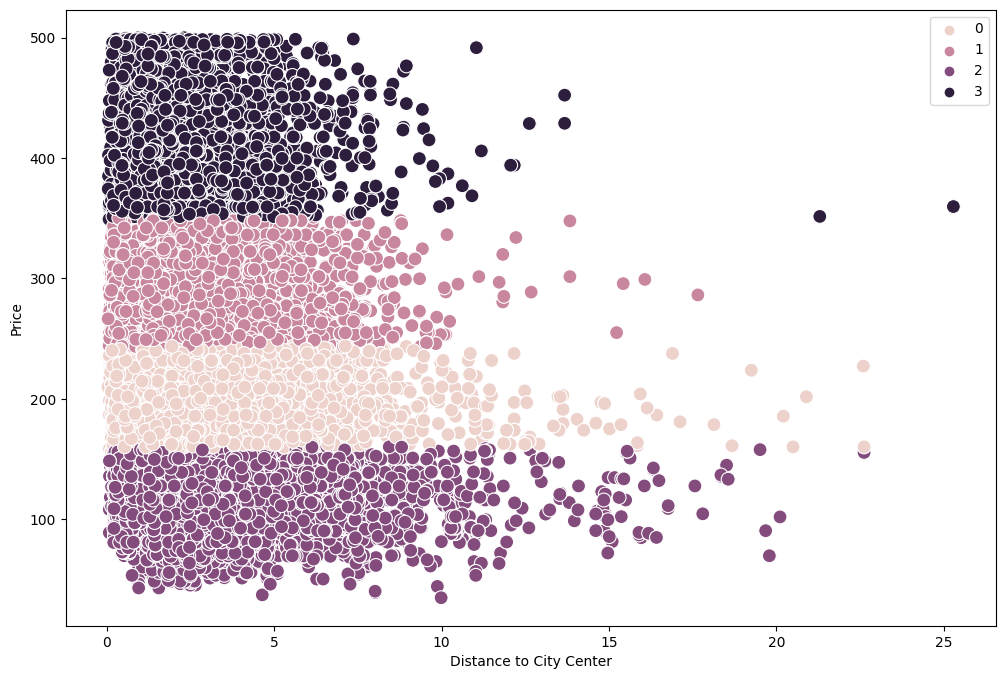

In [43]:
# Plot the clusters for the "Price" and "Distance from City Center" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= df_nums_new['City Center (km)'], y= df_nums_new['Price'],hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Distance to City Center') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

##### the cluster generated above shows that majority of accomodations are in closer distance from the city center. Also the largest cluster colored in dark purple shows that majority of accomodations are priced highly as the density of cluster is higher than ones colored lighter. As well the purple custer do not go further behind a 15 km distance. Whereas, hoterls in smaller price range do reach to 20+ distance of city center. 

### Cluster for Price and Distance from Metro 

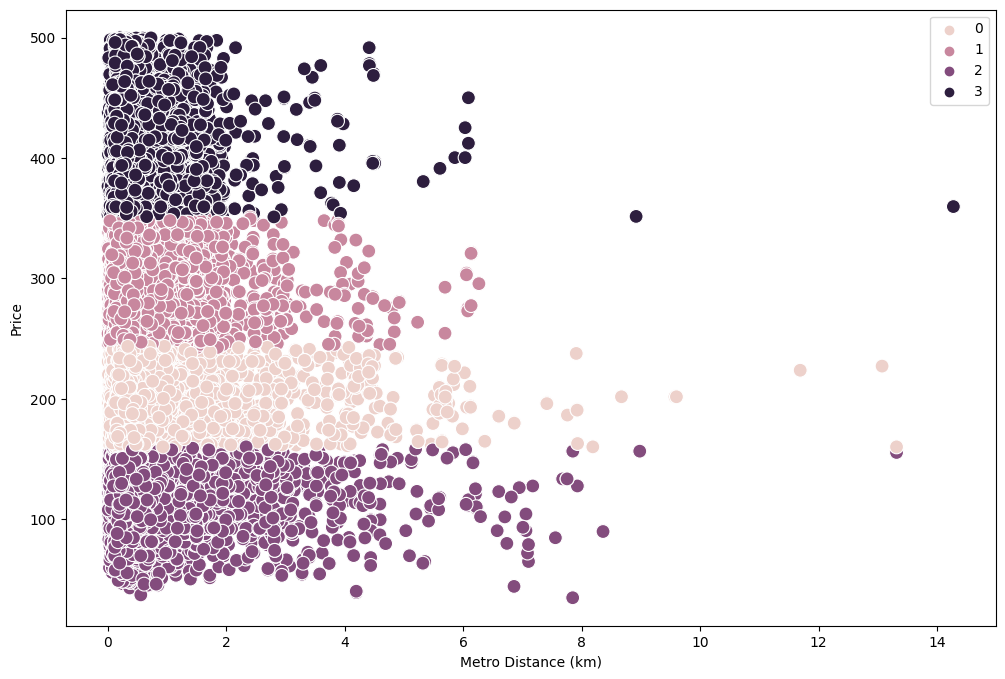

In [41]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= df_nums_new['Metro Distance (km)'], y= df_nums_new['Price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Metro Distance (km)') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Here simiar to distance from city center, accomodation located within less than 6 km-s are clustered in the highest prices, a few ones go beyond 6km, however clusters in lower price range can reach to about 8 to 10 km far from city center.

### Cluster for Cleanliness and Customer Satisfaction scores

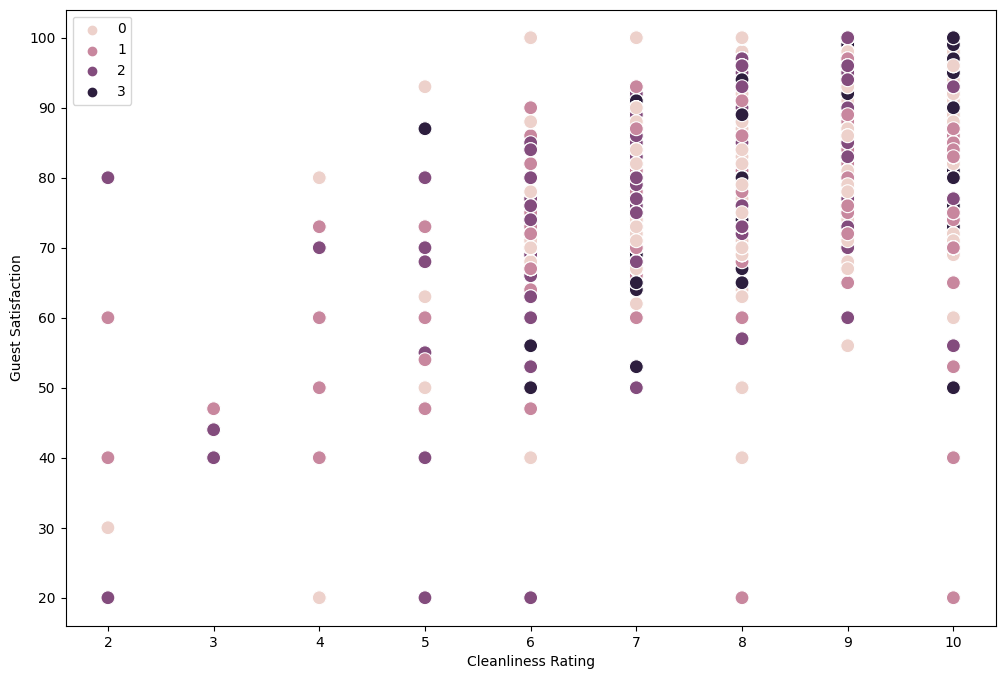

In [44]:
# Plot the clusters for the "Cleanliness Rating" and "Guest Satisfaction" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x= df_nums_new['Cleanliness Rating'], y= df_nums_new['Guest Satisfaction'],hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cleanliness Rating') # Label x-axis.
plt.ylabel('Guest Satisfaction') # Label y-axis.
plt.show()

#### the cluster above doesn't reveal much as the plot doesn't show a certain grouping of clusters

In [46]:
df_nums_new.loc[df_nums_new['clusters'] == 3, 'cluster'] = 'dark purple'
df_nums_new.loc[df_nums_new['clusters'] == 2, 'cluster'] = 'purple'
df_nums_new.loc[df_nums_new['clusters'] == 1, 'cluster'] = 'pink'
df_nums_new.loc[df_nums_new['clusters'] == 0, 'cluster'] = 'cream'

/var/folders/qs/9rqsgdxj377_cxzw1z92pxbh0000gn/T/ipykernel_21048/1721348778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nums_new.loc[df_nums_new['clusters'] == 3, 'cluster'] = 'dark purple'


In [47]:
df_nums_new.groupby('cluster').agg({'Price':['mean', 'median'], 
                         'Cleanliness Rating':['mean', 'median'], 
                         'Guest Satisfaction':['mean', 'median'],
                          'Metro Distance (km)':['mean', 'median'],
                          'City Center (km)' : ['mean','median']})

Price             Cleanliness Rating         \
                   mean      median               mean median   
cluster                                                         
cream        408.675070  401.280733           9.442692   10.0   
dark purple  119.061111  122.712292           9.416700   10.0   
pink         194.172287  193.168049           9.474322   10.0   
purple       283.475219  278.396176           9.437201   10.0   

            Guest Satisfaction        Metro Distance (km)            \
                          mean median                mean    median   
cluster                                                               
cream                92.936691   95.0            0.517916  0.312967   
dark purple          93.062703   95.0            0.647322  0.430276   
pink                 93.232682   95.0            0.635547  0.408816   
purple               92.889563   95.0            0.564781  0.368097   

            City Center (km)            
                        mean    median  
cluster                                 
cream               2.488279  2.114144  
dark purple         2.947845  2.385261  
pink                2.704443  2.316077  
purple              2.461546  2.155789

### From the cluster grouping above, we can conclude the following:
#### cream cluster has is the closest to both metro stations and city center, however it contains highest priced accomodations which might not contain so much of budget-friendly options.
#### cleanliness and guest satisfaction scores are not playing a major role in differeniating clusters, so I will not go into details of them. 
#### dark purple cluster seem to be the most budget-friendly cluster in terms of pricing, and not very far from city center and metro stations compared to other clusters.